In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
#Turn each working directory into a variable
SAPN_0762 = str(r"Original Data\Sistematizacion Monitoreo 5_SAPN-Res0762_Ajustado.xlsx")
SAPN_1166 = str(r"Original Data\Sistematizacion Monitoreo 5_SAPN-Res1166_Ajustado.xlsx")
vedas500_675 = str(r"Original Data\Sistematización Monitoreo 5_Veda 500-Res675.xlsx")
vedas500_766 = str(r"Original Data\Sistematización Monitoreo 5_Veda 500-Res766.xlsx")
AF = str(r"Original Data\Sistematización_AF_Monitoreo 6.xlsx")
Sibaté = str(r"Original Data\Sistematizacion_Monitoreo 4-SAPR-Sibaté.xlsx")
Esmeralda = str(r"Original Data\Sistematización_SAPR-Esmeralda_Monitoreo 3.xlsx")
Peñas = str(r"Original Data\Sistematización_SAPR-Peñas_Monitoreo 2.xlsx")
Vedas230 = str(r"Original Data\Sistematización_Veda230_Monitoreo 2_AjustadoFeb2021.xlsx")

#Import each file into a dataframe
df_SAPN_0762=pd.read_excel(SAPN_0762)
df_SAPN_1166=pd.read_excel(SAPN_1166)
df_vedas500_675=pd.read_excel(vedas500_675)
df_vedas500_766=pd.read_excel(vedas500_766)
df_AF=pd.read_excel(AF)
df_Sibaté=pd.read_excel(Sibaté)
df_Esmeralda=pd.read_excel(Esmeralda)
df_Peñas=pd.read_excel(Peñas)
df_Vedas230=pd.read_excel(Vedas230)

#create tuples of relevant information I want to add.
totaldata = (SAPN_0762, SAPN_1166, vedas500_675, vedas500_766, AF, Sibaté, Esmeralda, Peñas, Vedas230)
df_vars = (df_SAPN_0762, df_SAPN_1166, df_vedas500_675, df_vedas500_766, df_AF, df_Sibaté, df_Esmeralda, df_Peñas, df_Vedas230)
predios = ('Banqueo', 'Banqueo', 'Peñas', 'Peñas', 'Encenillo', 'Sibaté', 'Esmeralda', 'Peñas', 'Esmeralda')



In [2]:
Esmeralda = str(r"Original Data\Sistematización_SAPR-Esmeralda_Monitoreo 3.xlsx")
Peñas = str(r"Original Data\Sistematización_SAPR-Peñas_Monitoreo 3.xlsx")

df_Esmeralda=pd.read_excel(Esmeralda)
df_Peñas=pd.read_excel(Peñas)



In [3]:
print(df_Esmeralda.shape)
print(df_Peñas.shape)

(11943, 28)
(6588, 28)


In [4]:
df_SAPR=pd.concat([df_Esmeralda, df_Peñas])

In [24]:
df_SAPR.head

<bound method NDFrame.head of           Fecha Even_mon    ID                Especie        Escenario  \
0    2020-11-01       T1     1  Verbesina crassiramea   Pastos limpios   
1    2020-11-01       T1     2  Verbesina crassiramea   Pastos limpios   
2    2020-11-01       T1     3  Verbesina crassiramea   Pastos limpios   
3    2020-11-01       T1     4    Lupinus interruptus   Pastos limpios   
4    2020-11-01       T1     5    Lupinus interruptus   Pastos limpios   
...         ...      ...   ...                    ...              ...   
6583 2021-07-21       T3  2190  Verbesina crassiramea  Veg. secundaria   
6584 2021-07-21       T3  2191  Verbesina crassiramea  Veg. secundaria   
6585 2021-07-21       T3  2192  Verbesina crassiramea  Veg. secundaria   
6586 2021-07-21       T3  2193  Verbesina crassiramea  Veg. secundaria   
6587 2021-07-21       T3  2194  Verbesina crassiramea  Veg. secundaria   

           Estrategia  Tipo  No_Nuc/Faj/Mod  Línea  No_Ind  ...  ANE  PNE  \
0   

In [33]:
for col in df_SAPR.columns:
    print(col)

Fecha
Even_mon
ID
Especie
Escenario
Estrategia
Tipo
No_Nuc/Faj/Mod
Línea
No_Ind
Sup_Ind
Est_Fit
COL
VB
HER
PAT
COM
DM
ANE
PNE
Alt_Ind
DAB1_Ind
DAB2_Ind
DAB_Prom
Diam1_Ind
Diam2_Ind
Area_cop_Ind
Observaciones


In [34]:
df_SAPR['Sup_Ind'].head

<bound method NDFrame.head of 0       SI
1       SI
2       SI
3       SI
4       NO
        ..
6583    SI
6584    SI
6585    SI
6586    SI
6587    SI
Name: Sup_Ind, Length: 18531, dtype: object>

In [5]:
#get unique species names
species = df_SAPR['Especie'].unique().tolist()

In [6]:
species.sort()
species

['Ageratina ampla',
 'Ageratina boyacensis',
 'Aniba panurensis',
 'Axinaea sp.',
 'BAccharis latifolia',
 'Baccharis latifolia',
 'Bocconia frutescens',
 'Brunellia comocladifolia',
 'Cedrela Montana',
 'Cedrela montana',
 'Ceroxylon alpinum',
 'Cestrum mutisii',
 'Chamaedorea linearis',
 'Clusia multiflora',
 'Cordia cylindrostachya',
 'Croton magdalenensis',
 'Escallonia paniculata',
 'Guarea kunthiana',
 'Hedyosmum crenatum',
 'Helecho',
 'Juglans neotropica',
 'Lepechinia salviifolia',
 'Lippia hirsuta',
 'Lupinus interruptus',
 'Miconia sp.',
 'Morella pubescens',
 'Myrcianthes leucoxyla',
 'Myrsine coriacea',
 'Oreopanax incisus',
 'Palicourea angustifolia',
 'Piper nubigenum',
 'Quercus humboldtii',
 'Retrophyllum rospigliosii',
 'Rhamnus goudotiana',
 'Smallanthus pyramidalis',
 'Solanum oblongifolium',
 'Solanum oblongifolium ',
 'Tibouchina',
 'Verbesina crassiramea',
 'Verbesina nudipes',
 'Viburnum tinoides',
 'Weinmannia cundinamarcensis',
 'baccharis latifolia',
 'lupinu

In [7]:
#replace duplicate/incorrect values
df_SAPR['Especie'].replace(to_replace='BAccharis latifolia',value='Baccharis latifolia', inplace=True)
df_SAPR['Especie'].replace(to_replace='baccharis latifolia',value='Baccharis latifolia', inplace=True)
df_SAPR['Especie'].replace(to_replace='Cedrela Montana',value='Cedrela montana', inplace=True)
df_SAPR['Especie'].replace(to_replace='Myrcianthes leucoxyla',value='Mycianthes leucoxyla', inplace=True)
df_SAPR['Especie'].replace(to_replace='Solanum oblongifolium ',value='Solanum oblongifolium', inplace=True)
df_SAPR['Especie'].replace(to_replace='lupinus interruptus',value='Lupinus interruptus', inplace=True)

In [8]:
species = df_SAPR['Especie'].unique().tolist()
species.sort()
species

['Ageratina ampla',
 'Ageratina boyacensis',
 'Aniba panurensis',
 'Axinaea sp.',
 'Baccharis latifolia',
 'Bocconia frutescens',
 'Brunellia comocladifolia',
 'Cedrela montana',
 'Ceroxylon alpinum',
 'Cestrum mutisii',
 'Chamaedorea linearis',
 'Clusia multiflora',
 'Cordia cylindrostachya',
 'Croton magdalenensis',
 'Escallonia paniculata',
 'Guarea kunthiana',
 'Hedyosmum crenatum',
 'Helecho',
 'Juglans neotropica',
 'Lepechinia salviifolia',
 'Lippia hirsuta',
 'Lupinus interruptus',
 'Miconia sp.',
 'Morella pubescens',
 'Mycianthes leucoxyla',
 'Myrsine coriacea',
 'Oreopanax incisus',
 'Palicourea angustifolia',
 'Piper nubigenum',
 'Quercus humboldtii',
 'Retrophyllum rospigliosii',
 'Rhamnus goudotiana',
 'Smallanthus pyramidalis',
 'Solanum oblongifolium',
 'Tibouchina',
 'Verbesina crassiramea',
 'Verbesina nudipes',
 'Viburnum tinoides',
 'Weinmannia cundinamarcensis']

In [14]:
writer = pd.ExcelWriter('SAPR3.xlsx', engine='openpyxl')

In [15]:
df_SAPR.to_excel(writer, index=False, engine='openpyxl')

In [16]:
writer.save()

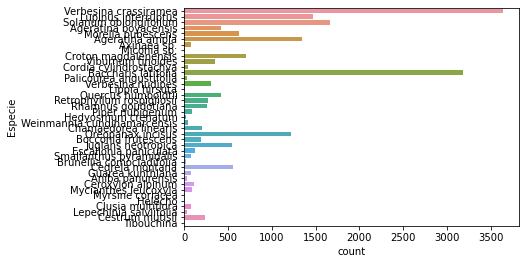

In [20]:
#number of measurements per species in the dataset
sns.countplot(data=df_SAPR, y='Especie');

In [54]:
# separate living and dead plants
living = df_SAPR[df_SAPR['Sup_Ind']=="SI"]
dead = df_SAPR[df_SAPR['Sup_Ind']=="NO"]
living_grouped = living.groupby(by="Especie").count()
dead_grouped = dead.groupby(by="Especie").count()

In [70]:
living_grouped = living_grouped['ID']
dead_grouped = dead_grouped['ID']


KeyError: 'ID'

In [72]:
dead_grouped

Especie
Ageratina ampla                 56
Ageratina boyacensis            12
Aniba panurensis                 8
Baccharis latifolia            186
Bocconia frutescens             24
Brunellia comocladifolia         3
Cedrela montana                 15
Cestrum mutisii                 42
Chamaedorea linearis             5
Cordia cylindrostachya           7
Croton magdalenensis            63
Escallonia paniculata           42
Guarea kunthiana                19
Juglans neotropica               8
Lepechinia salviifolia           1
Lippia hirsuta                   2
Lupinus interruptus            378
Morella pubescens               61
Mycianthes leucoxyla             3
Oreopanax incisus               18
Palicourea angustifolia          3
Quercus humboldtii              29
Rhamnus goudotiana              10
Smallanthus pyramidalis          1
Solanum oblongifolium           69
Verbesina crassiramea          105
Verbesina nudipes                9
Viburnum tinoides               13
Weinmannia c

In [82]:
Ratios = dead_grouped/living_grouped
Ratios = Ratios.transpose()

pandas.core.series.Series

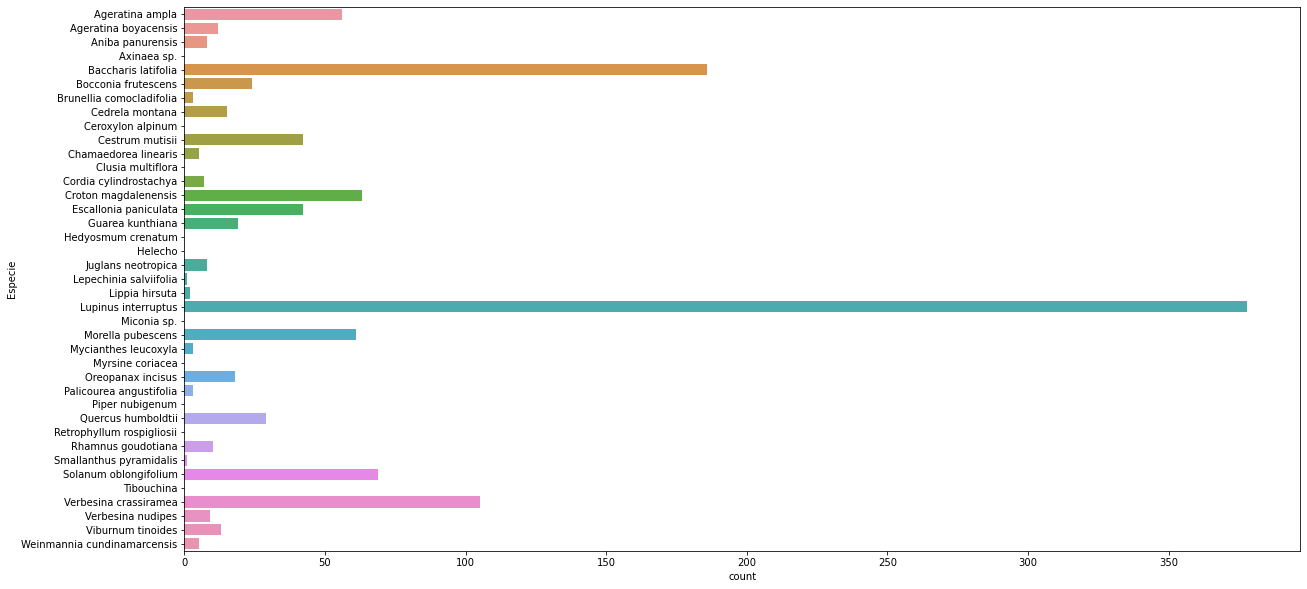

In [85]:
#Total number of dead plants by species. 
plt.figure(figsize=(20,10))
sns.countplot(data=dead, y="Especie", order=species);

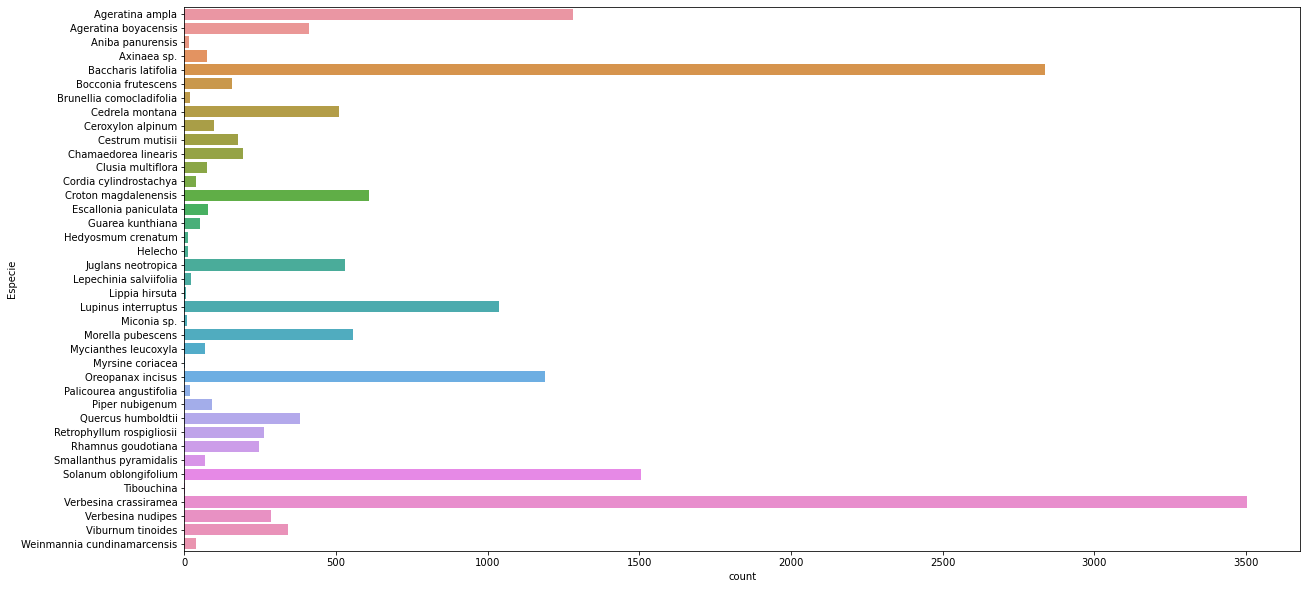

In [88]:
#Total number of living plants by species. Note that some species have died disproportionately to others.
plt.figure(figsize=(20,10))
sns.countplot(data=living, y='Especie', order=species);

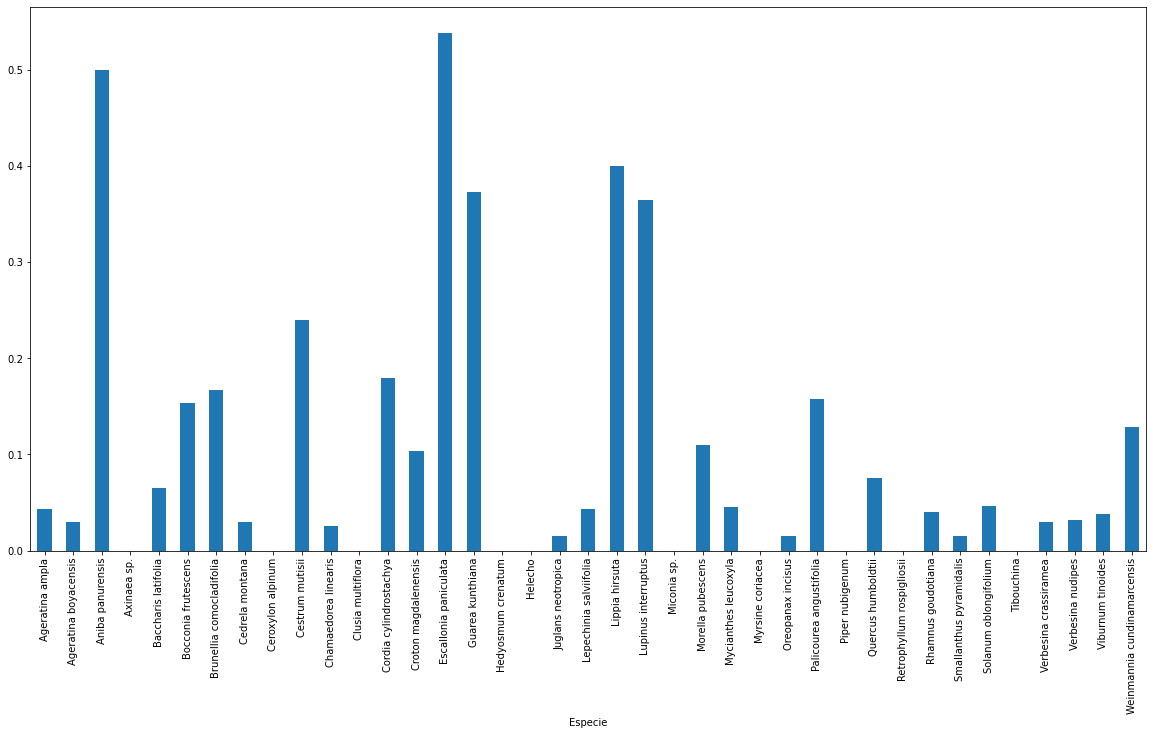

In [91]:
#plot the Ratio of dead to living plants per species
#The most successful species have the lowest ratios.
#Not 100% accurate, plant replacement means that most ratios are artificially lowered.
plt.figure(figsize=(20,10))
Ratios.plot(kind='bar');

In [36]:
#split the dataset into the three collection periods.
t1=living[living['Even_mon']=='T1']
t2=living[living['Even_mon']=='T2']
t3=living[living['Even_mon']=='T3']

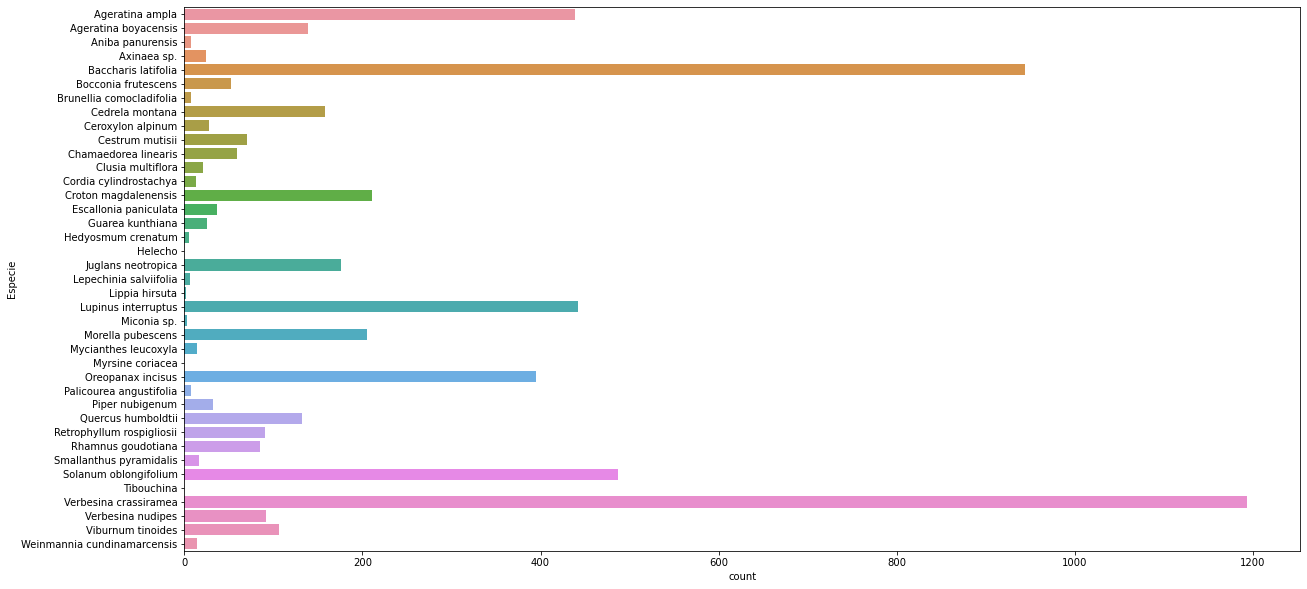

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(data=t1, y='Especie', order = species);

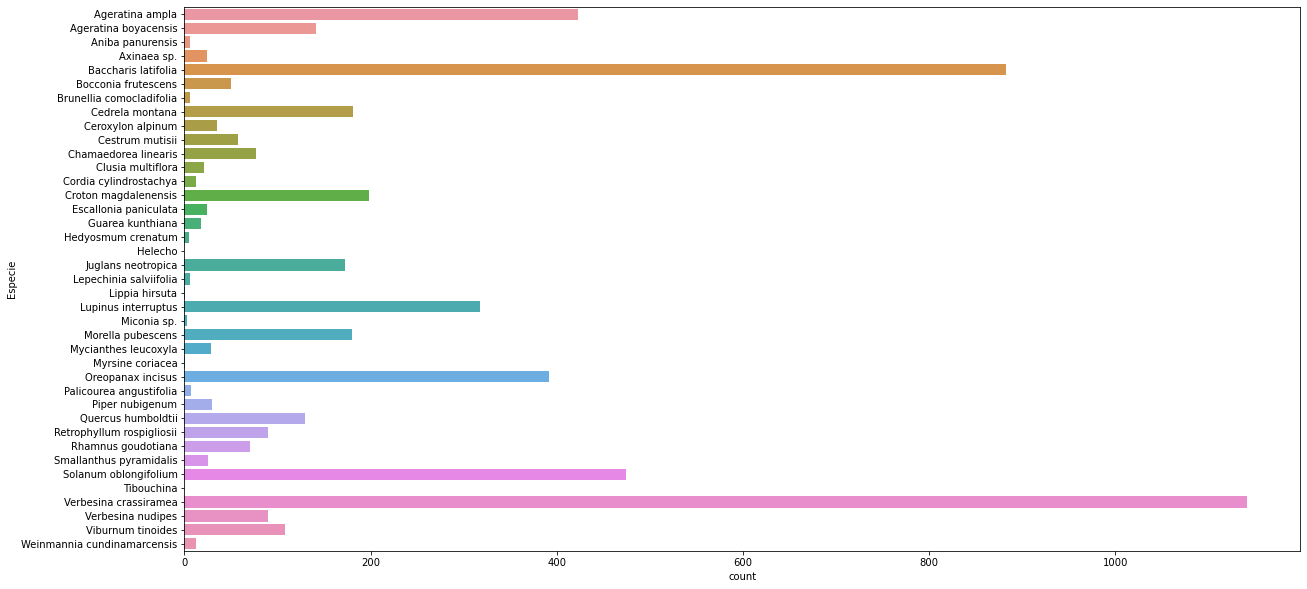

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(data=t2, y='Especie', order = species);

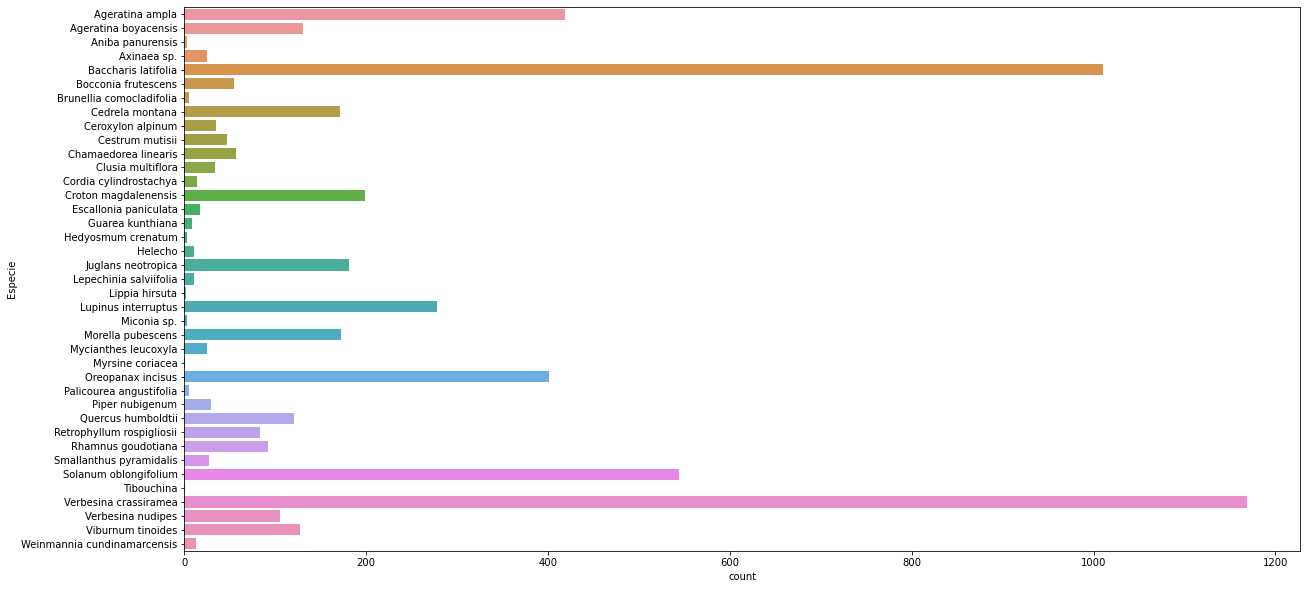

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(data=t3, y='Especie', order = species);